# Our public dataset "Superconductivity" 

In [6]:
# Libraries Data Description / Preparation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
import json
warnings.filterwarnings('ignore')

In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE # Feature Importance using Recursive Feature Elimination (RFE)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
# Loading necessary Files <- your file path here
df = pd.read_csv("C:/Users/Nishant Moona/Downloads/superconductivty+data/train.csv")

In [9]:
#Displaying top 5 rows
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [10]:
#Checking Duplicate Entries
df.duplicated().any()

True

In [11]:
duplicates = df.duplicated()
print ("Duplicates:\n", duplicates)

Duplicates:
 0        False
1        False
2        False
3        False
4        False
         ...  
21258    False
21259    False
21260    False
21261    False
21262    False
Length: 21263, dtype: bool


In [12]:
duplicate_rows = df[df.duplicated()]
print ("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
8503                    4         76.444563             51.381751   
12598                   2         39.513500             45.227500   
12736                   2        105.962750            121.538200   
12798                   2        141.926690            149.730928   
12829                   2        141.568190            141.568190   
...                   ...               ...                   ...   
16715                   2         60.332250             55.636875   
16734                   2        141.568190            131.835828   
20068                   2        114.090000            119.228900   
20069                   2        118.289000            120.024500   
20072                   3        143.662190            135.668337   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
8503           59.356672              35.040763             1.199541   
12598     

In [13]:
df.shape

(21263, 82)

In [14]:
# Removing the duplicates
df_cleaned = df.drop_duplicates (keep='first')
print ("DataFrame after removing duplicates:\n", df_cleaned)

DataFrame after removing duplicates:
        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21197 non-null  int64  
 1   mean_atomic_mass                 21197 non-null  float64
 2   wtd_mean_atomic_mass             21197 non-null  float64
 3   gmean_atomic_mass                21197 non-null  float64
 4   wtd_gmean_atomic_mass            21197 non-null  float64
 5   entropy_atomic_mass              21197 non-null  float64
 6   wtd_entropy_atomic_mass          21197 non-null  float64
 7   range_atomic_mass                21197 non-null  float64
 8   wtd_range_atomic_mass            21197 non-null  float64
 9   std_atomic_mass                  21197 non-null  float64
 10  wtd_std_atomic_mass              21197 non-null  float64
 11  mean_fie                         21197 non-null  float64
 12  wtd_mean_fie      

In [16]:
#Checking the missing values
df_cleaned.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [17]:
#descriptive statistics summarize the central tendency, dispersion, and shape of a dataset distribution
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [18]:
corr_matrix = df_cleaned.corr()

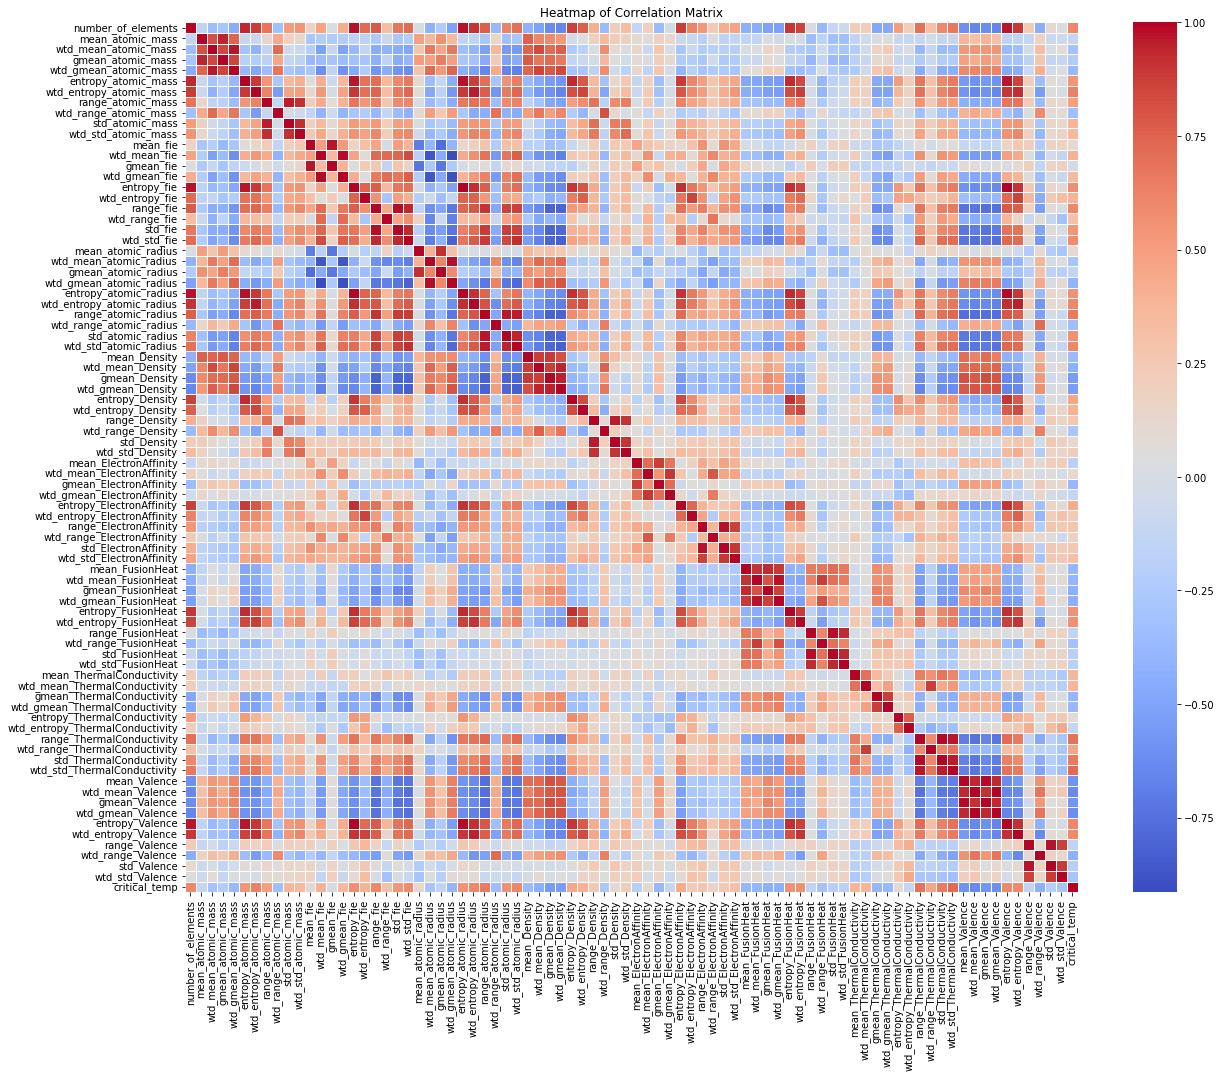

In [19]:
plt.figure(figsize=(20, 16))

# Creating a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show() # Showing the plot

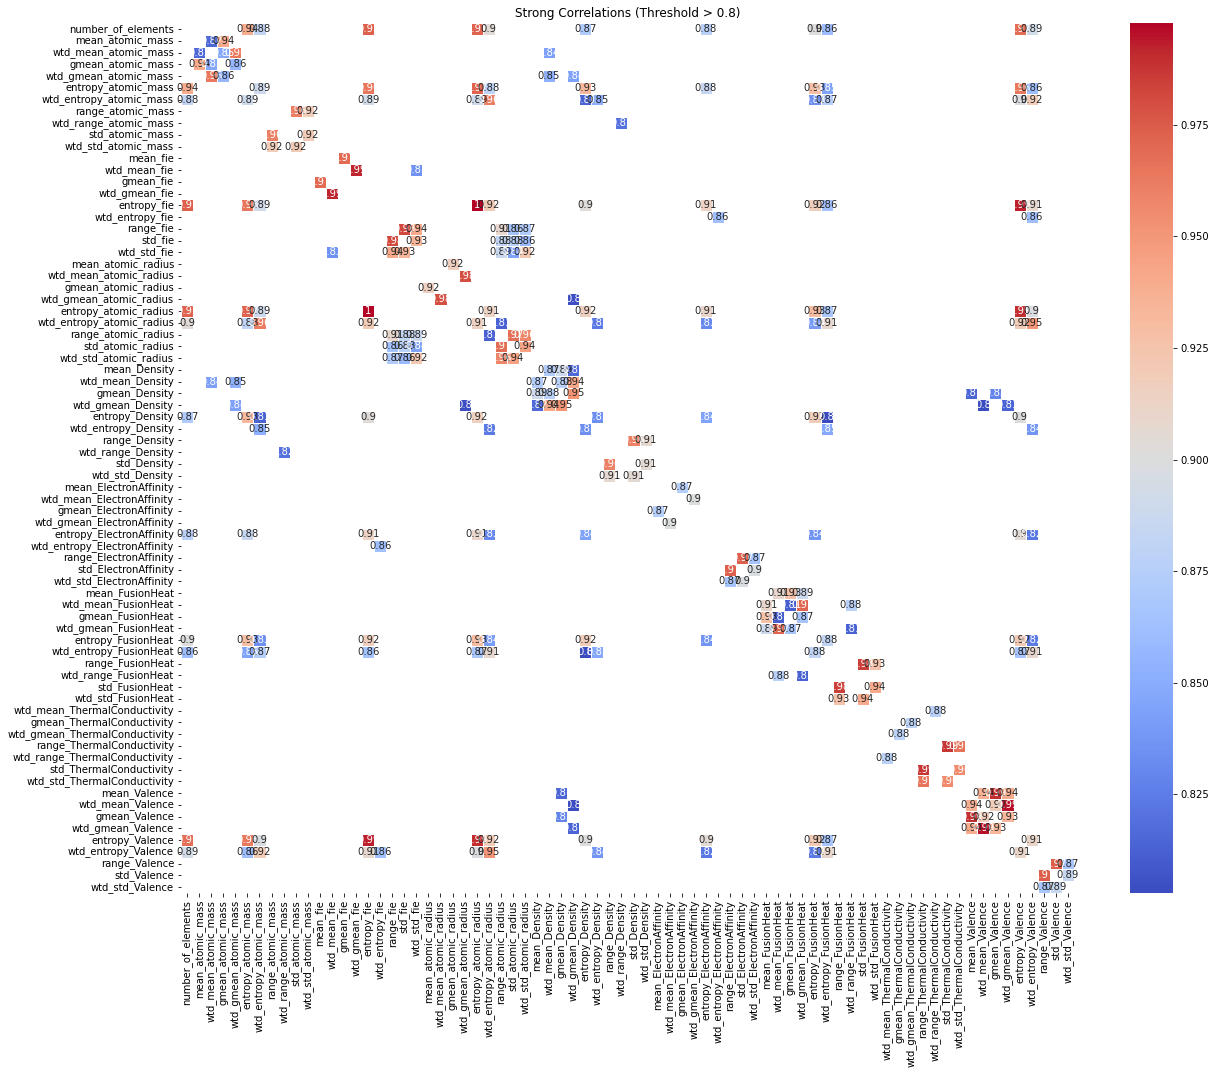

In [20]:
threshold = 0.8
strong_corr = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

plt.figure(figsize=(20, 16))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Strong Correlations (Threshold > 0.8)')
plt.show()

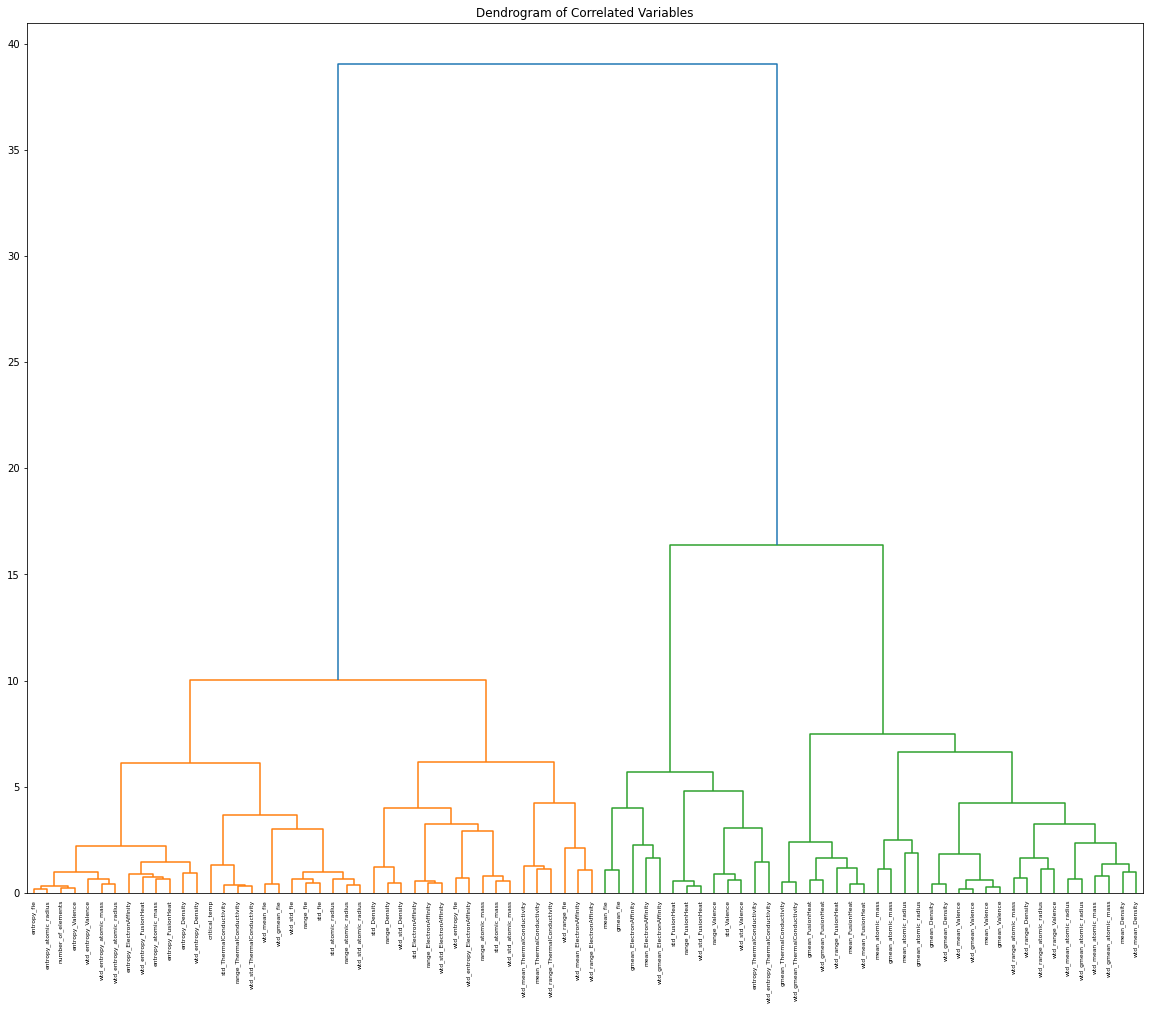

In [21]:
# Dendogram of correlated variables
Z = linkage(corr_matrix, 'ward')

plt.figure(figsize=(20, 16))
dendrogram(Z, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Dendrogram of Correlated Variables')
plt.show()

# Linear Regression

In [22]:
# 1. Linear Regression

# This is our cleaned dataframe and 'critical_temp' is the target variable
X = df_cleaned.drop(columns=['critical_temp']) # Target
y = df_cleaned['critical_temp'] # Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Linear regression assumes that the features are on a comparable scale.
# Standardizing the features can improve the performance and convergence of the model.

# Fitting the model
model = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Fitting the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Use statsmodels library to calculate p-values
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Mean Cross-Validation MSE: 309.32058791289774
Training Mean Squared Error: 306.9365709690743
Test Mean Squared Error: 317.9093247537737
                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.5
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:47:07   Log-Likelihood:                -72614.
No. Observations:               16957   AIC:                         1.454e+05
Df Residuals:                   16875   BIC:                         1.460e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

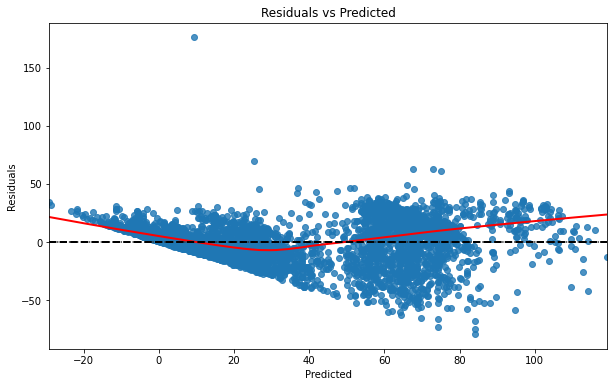

In [23]:
# Residual analysis for Linear Regression
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()
#Analyze the residuals for patterns that indicate issues with the model (non-linearity, heteroscedasticity).

                         Coefficient
wtd_mean_atomic_radius     92.775696
wtd_mean_Valence           34.144449
entropy_Valence            29.416179
wtd_gmean_fie              26.977178
std_ElectronAffinity       26.778264
...                              ...
wtd_mean_fie              -29.247525
wtd_mean_atomic_mass      -29.525968
wtd_gmean_Valence         -37.304064
entropy_fie               -39.254941
wtd_gmean_atomic_radius  -101.121588

[81 rows x 1 columns]


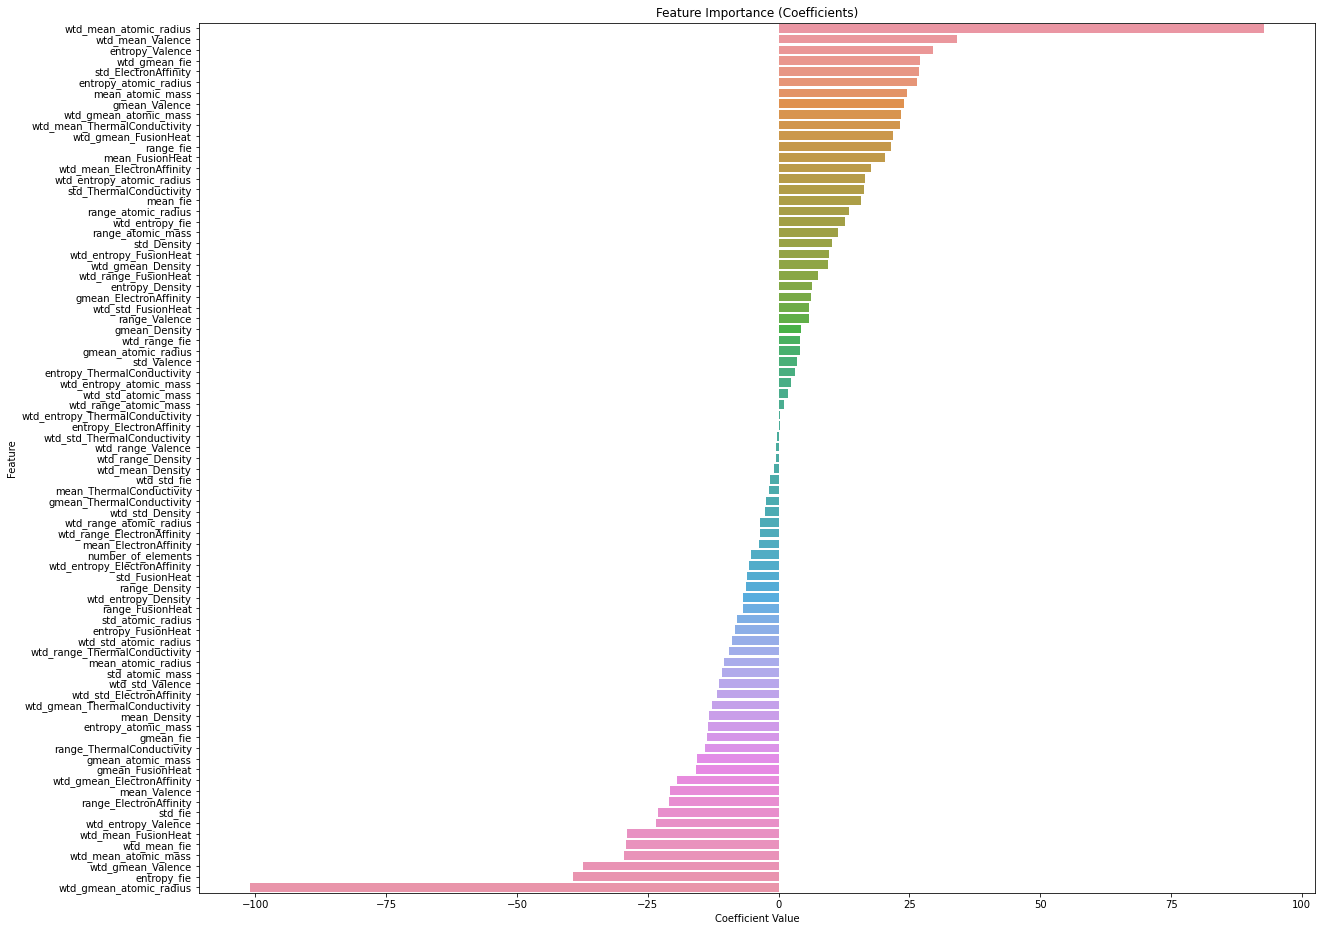

In [24]:
# Feature importance for Linear Regression
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)
#interpret the importance of features

# Plotting feature importance
plt.figure(figsize=(20, 16))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients)')
plt.show()

# Lasso Regularization with tuning parameters

In [25]:
# 2. Lasso 
# This is our cleaned dataframe and 'critical_temp' is the target variable
X = df_cleaned.drop(columns=['critical_temp']) # Target
y = df_cleaned['critical_temp'] # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Fitting the model
lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X_train_scaled, y_train)

# Predicting on the test and training data
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

# Calculating Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Evaluating the best alpha
print("Best alpha:", lasso_cv.alpha_) # This is regularisation

# Getting coefficients and p-values using statsmodels library
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Mean Cross-Validation MSE: 309.32058791289774
Training Mean Squared Error: 316.3558867017992
Test Mean Squared Error: 329.0104589889741
Best alpha: 0.024693206655158968
                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.5
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:47:20   Log-Likelihood:                -72614.
No. Observations:               16957   AIC:                         1.454e+05
Df Residuals:                   16875   BIC:                         1.460e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

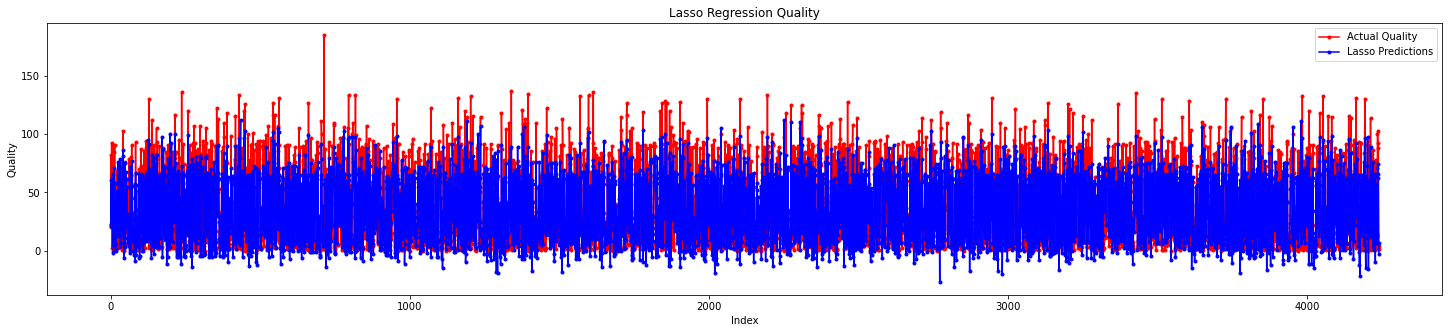

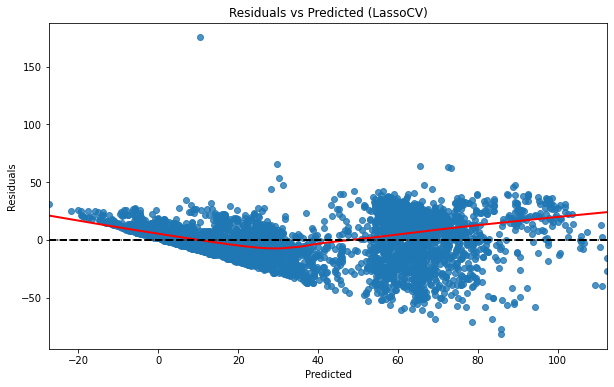

In [26]:
# Preparing the data for plotting the graphs
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (Lasso)': y_test_pred
})

# Reset index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting our results
plt.figure(figsize=(25, 5))
plt.title("Lasso Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (Lasso)"], color="blue", marker=".", label="Lasso Predictions")
plt.legend()
plt.show()

# Residual analysis
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (LassoCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

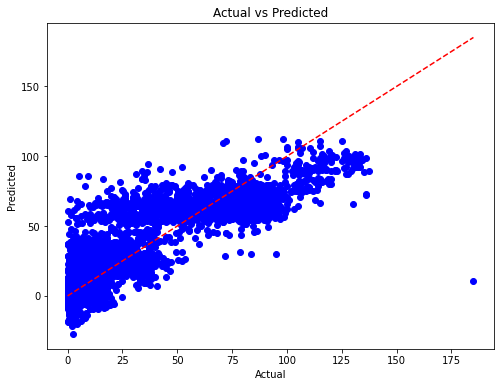

In [27]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Ridge Regularization with tuning parameters

In [31]:
# 3. Ridge Regression
# This is our cleaned dataframe and 'critical_temp' is the target variable
X = df_cleaned.drop(columns=['critical_temp']) # Target
y = df_cleaned['critical_temp'] # Features

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': np.logspace(-2, 2, 10)  # We used wider range of alphas as we have large dataset 
}

# Initialize Ridge model
ridge = Ridge(max_iter=1000)

# Initialize GridSearchCV with the Ridge model and parameter grid
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
# Cross-validation of 5, n_jobs define the number of available CPUs to run the model

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score from GridSearchCV
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used neg_mean_squared_error

print("Best Parameters:", best_params)
print("Best Cross-Validation MSE:", best_score)

# Use the best estimator from GridSearchCV to make predictions
best_model = grid_search.best_estimator_

# Predicting on the test data
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error with Best Model:", mse_train)
print("Test Mean Squared Error with Best Model:", mse_test)

# Print the best alpha
print("Best alpha:", best_model.alpha) # For regularization

# Get coefficients and p-values using statsmodels library
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Best Parameters: {'alpha': 0.0774263682681127}
Best Cross-Validation MSE: 309.30901390320406
Training Mean Squared Error with Best Model: 306.9436488298782
Test Mean Squared Error with Best Model: 317.9248285024587
Best alpha: 0.0774263682681127
                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.5
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:55:34   Log-Likelihood:                -72614.
No. Observations:               16957   AIC:                         1.454e+05
Df Residuals:                   16875   BIC:                         1.460e+05
Df Model:                          81                                         
Covariance Type:            nonrobust      

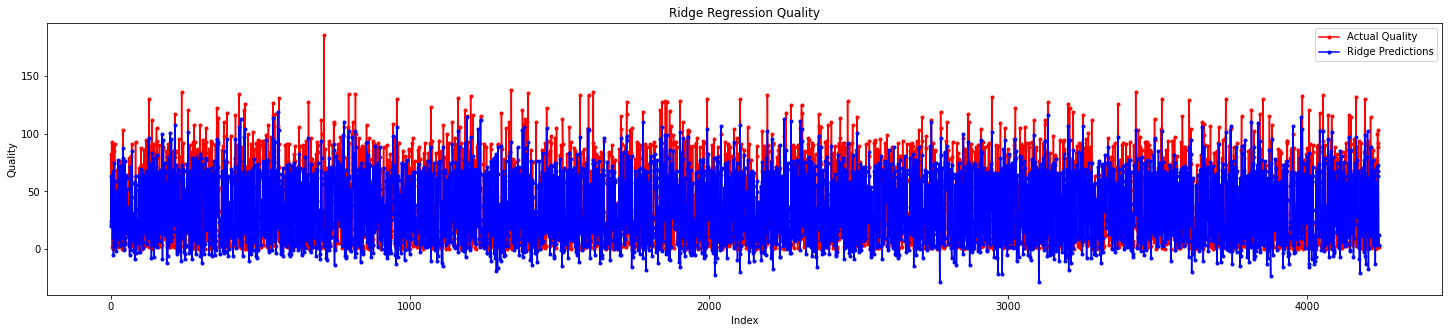

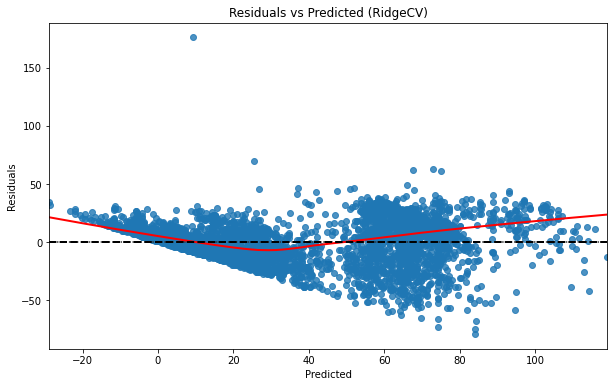

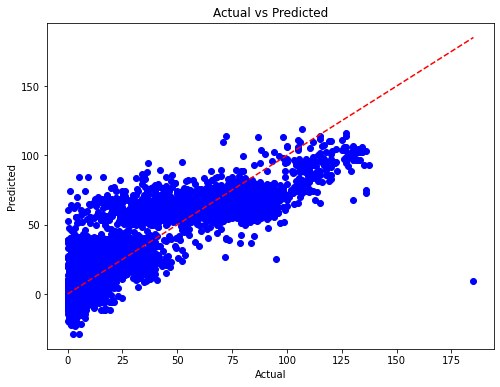

In [32]:
# Preparing our data for plotting the graph
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (Ridge)': y_test_pred
})

# Reset index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("Ridge Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (Ridge)"], color="blue", marker=".", label="Ridge Predictions")
plt.legend()
plt.show()

# Residual analysis for Ridge
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (RidgeCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Elastic Net Regularization with tuning parameters

In [33]:
# 4. Elastic Net 
# This is our dataframe and 'critical_temp' is the target variable
X = df_cleaned.drop(columns=['critical_temp']) # Target
y = df_cleaned['critical_temp'] # Features

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': np.logspace(-4, 4),  # We use wider range of alphas as we have large dataset
    'l1_ratio': np.linspace(0, 1, 10)  # ElasticNet mixing parameter, from Lasso (1) to Ridge (0)
}

# Initialize ElasticNet model
elasticnet = ElasticNet(max_iter=1000)

# Initialize GridSearchCV with the ElasticNet model and parameter grid
grid_search = GridSearchCV(elasticnet, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Cross-validation of 5 and n_jobs is number of available CPUs to run our model

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score from GridSearchCV
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used neg_mean_squared_error

print("Best Parameters:", best_params)
print("Best Cross-Validation MSE:", best_score)

# Use the best estimator from GridSearchCV to make predictions
best_model = grid_search.best_estimator_

# Predict on the test data
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error with Best Model:", mse_train)
print("Test Mean Squared Error with Best Model:", mse_test)

# Print the best alpha (regularization strength) and l1_ratio
print("Best alpha:", best_model.alpha)
print("Best l1_ratio:", best_model.l1_ratio)

# Get coefficients and p-values using statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Best Parameters: {'alpha': 0.00014563484775012445, 'l1_ratio': 0.0}
Best Cross-Validation MSE: 311.6650054629419
Training Mean Squared Error with Best Model: 309.6057665239299
Test Mean Squared Error with Best Model: 321.1259068417108
Best alpha: 0.00014563484775012445
Best l1_ratio: 0.0
                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.5
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:07:54   Log-Likelihood:                -72614.
No. Observations:               16957   AIC:                         1.454e+05
Df Residuals:                   16875   BIC:                         1.460e+05
Df Model:                          81                                         


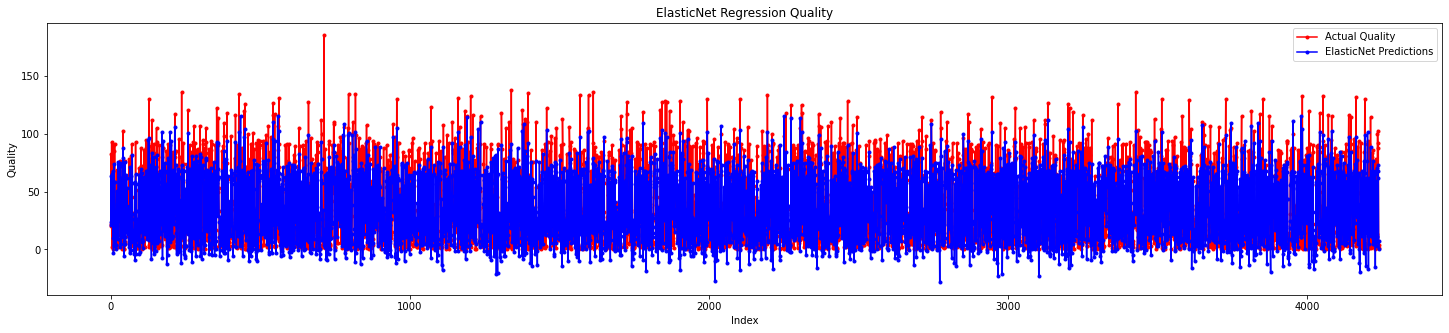

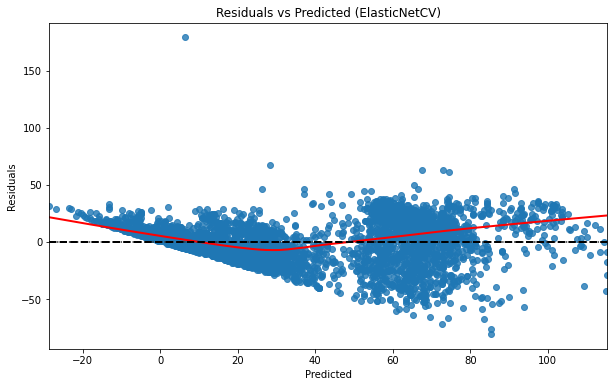

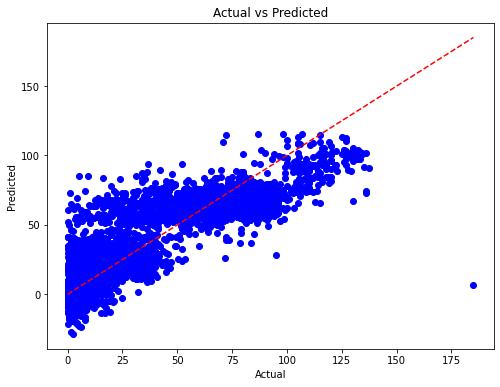

In [34]:
# Preparing the data for plotting our graphs
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (ElasticNet)': y_test_pred
})

# Resetting the index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("ElasticNet Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (ElasticNet)"], color="blue", marker=".", label="ElasticNet Predictions")
plt.legend()
plt.show()

# Residual analysis for ElasticNetCV
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (ElasticNetCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# SVC Classifer on Lasso

In [35]:
# 5. SVC Classifier on Lasso
# Create a binary classification target
# Superconductors are those which have temperature higher than 77K
df_cleaned['superconductor'] = df_cleaned['critical_temp'] > 77

X = df_cleaned.drop(columns=['critical_temp', 'superconductor'])
y = df_cleaned['superconductor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso feature selection
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)

# Select features based on the Lasso model
lasso_selected_features = np.where(lasso.coef_ != 0)[0]
X_train_lasso = X_train_scaled[:, lasso_selected_features]
X_test_lasso = X_test_scaled[:, lasso_selected_features]

# Fit the SVC model using the selected features from Lasso
svc_model = SVC(kernel='linear', probability=True, random_state=0)
svc_model.fit(X_train_lasso, y_train)

# Predict on the test data
y_test_pred = svc_model.predict(X_test_lasso)
y_test_prob = svc_model.predict_proba(X_test_lasso)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[3188  244]
 [ 240  568]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3432
        True       0.70      0.70      0.70       808

    accuracy                           0.89      4240
   macro avg       0.81      0.82      0.82      4240
weighted avg       0.89      0.89      0.89      4240


Accuracy Score: 0.8858490566037736


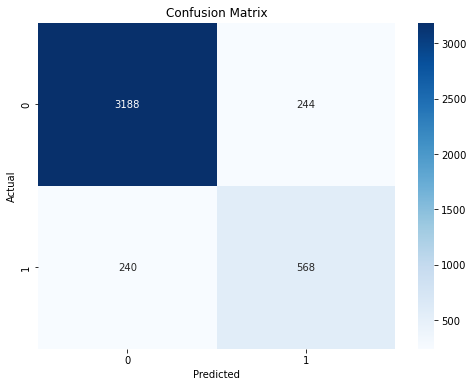

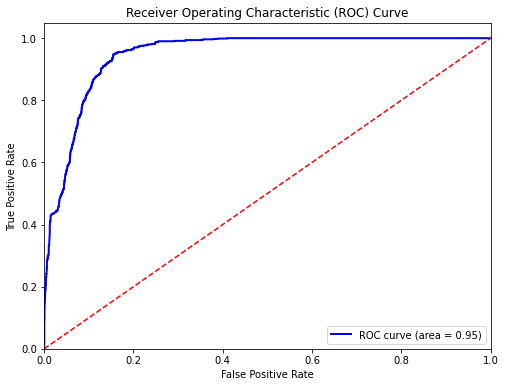

In [39]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SVC Classifier in Ridge

In [40]:
# 6. SVC Classifier in Ridge
# Create a binary classification target
df_cleaned['superconductor'] = df_cleaned['critical_temp'] > 77
# Superconductor property, temperatures above than 77K

X = df_cleaned.drop(columns=['critical_temp', 'superconductor']) 
y = df_cleaned['superconductor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression for feature selection
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge.fit(X_train_scaled, y_train)

# Select features based on the Ridge model
ridge_selected_features = np.where(ridge.coef_ != 0)[0] # Coefficient is not equals to zero
X_train_ridge = X_train_scaled[:, ridge_selected_features]
X_test_ridge = X_test_scaled[:, ridge_selected_features]

# Fit the SVC model using the selected features from Ridge
svc_model = SVC(kernel='linear', probability=True, random_state=0)
svc_model.fit(X_train_ridge, y_train)

# Predict on the test data
y_test_pred = svc_model.predict(X_test_ridge)
y_test_prob = svc_model.predict_proba(X_test_ridge)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[3194  238]
 [ 238  570]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3432
        True       0.71      0.71      0.71       808

    accuracy                           0.89      4240
   macro avg       0.82      0.82      0.82      4240
weighted avg       0.89      0.89      0.89      4240


Accuracy Score: 0.8877358490566037


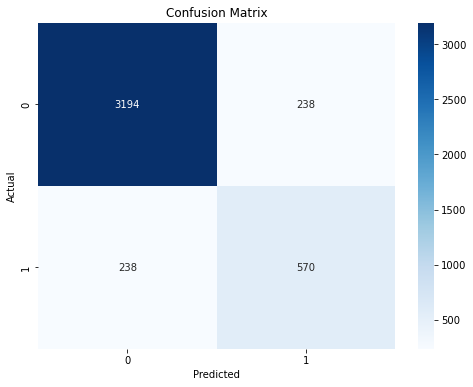

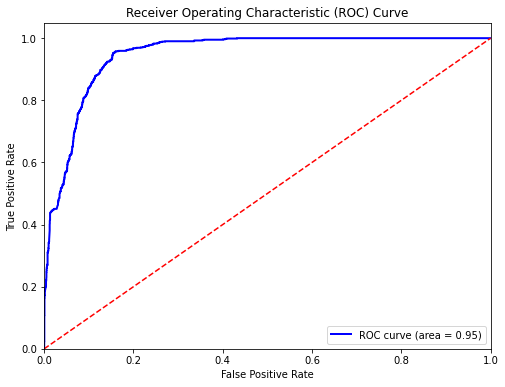

In [44]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SVC Classifier on Elastic Net

In [45]:
# 7. SVC Classifier on Elastic Net
# Create a binary classification target
df_cleaned['superconductor'] = df_cleaned['critical_temp'] > 77

X = df_cleaned.drop(columns=['critical_temp', 'superconductor'])
y = df_cleaned['superconductor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Elastic Net regularization for feature selection
elastic_net = ElasticNetCV(cv=5, random_state=0)
elastic_net.fit(X_train_scaled, y_train)

# Select features based on the Elastic Net coefficients
elastic_net_selected_features = np.where(elastic_net.coef_ != 0)[0]
X_train_elastic_net = X_train_scaled[:, elastic_net_selected_features]
X_test_elastic_net = X_test_scaled[:, elastic_net_selected_features]

# Fit the SVC model using the selected features from Elastic Net
svc_model = SVC(kernel='linear', probability=True, random_state=0)
svc_model.fit(X_train_elastic_net, y_train)

# Predict on the test data
y_test_pred = svc_model.predict(X_test_elastic_net)
y_test_prob = svc_model.predict_proba(X_test_elastic_net)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[3190  242]
 [ 242  566]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3432
        True       0.70      0.70      0.70       808

    accuracy                           0.89      4240
   macro avg       0.81      0.81      0.81      4240
weighted avg       0.89      0.89      0.89      4240


Accuracy Score: 0.8858490566037736


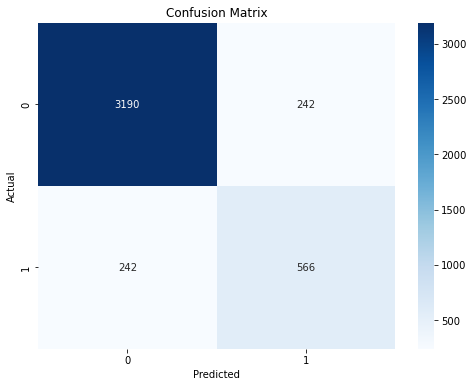

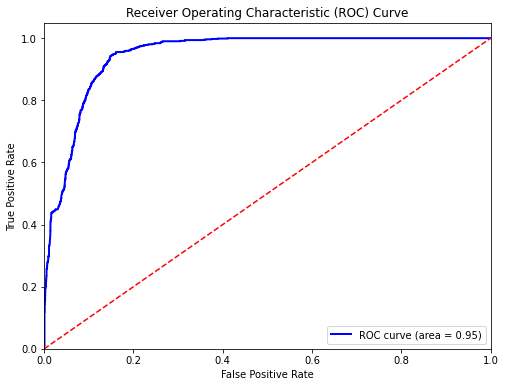

In [46]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

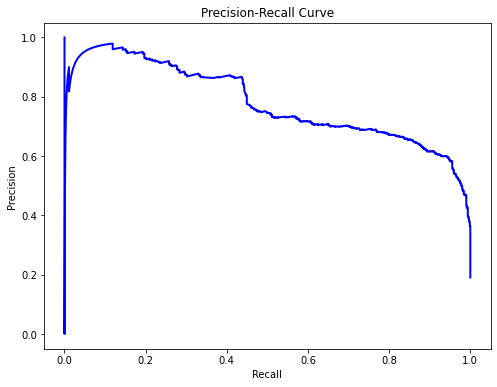

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance using Recursive Feature Elimination (RFE)
rfe = RFE(svc_model, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X_train_scaled, y_train)

# Plotting feature importances
ranking = rfe.ranking_
features = X.columns

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), ranking, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance Ranking')
plt.ylabel('Features')
plt.title('Feature Importances (RFE)')
plt.show()

# MLP Classifier

In [ ]:
# 8. MLP Classifier

# Create a binary classification target
df_cleaned['superconductor'] = df_cleaned['critical_temp'] > 77

X = df_cleaned.drop(columns=['critical_temp', 'superconductor'])
y = df_cleaned['superconductor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Classifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = mlp_classifier.predict(X_test_scaled)
y_test_prob = mlp_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a binary classification target based on the median critical temperature
df_cleaned['superconductor'] = df_cleaned['critical_temp'] > 77

# Define features and target variable
X = df_cleaned.drop(columns=['critical_temp', 'superconductor'])
y = df_cleaned['superconductor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model with L2 regularization
mlp = MLPClassifier(max_iter=500, random_state=0)

# Define the grid of hyperparameters
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]  # L2 regularization parameter
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_mlp = grid_search.best_estimator_

# Predict on the test data
y_test_pred = best_mlp.predict(X_test_scaled)
y_test_prob = best_mlp.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

In [ ]:
# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Superconductor', 'Superconductor'], yticklabels=['Not Superconductor', 'Superconductor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_mlp, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Precision- Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()